<a href="https://colab.research.google.com/github/AntonySkibidi/automation_robotics_lab/blob/master/Kopia_notatnika_lab_auto_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antoni Paprocki 252548 Oliwier Janowski 250180 Jędrzej Simiński 250192

In [ ]:
!pip install pulp sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 41.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 20.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Statistics & Machine Learning in Automation and Operations

Machne learning is a field of AI that focuses on building systems that learn from data.
The goal is to use data to understand the underlying patterns and make predictions.

In general we can use:

- in a supervised way, where we somehow "know" an answer to a particular question (on trainining questions), for example: we know which engines broke based on their behaviour or we know which images show us defects
- in an unsupervised way, where we have data but we don't nesseesarely know the answers. What we ask the AI to do is to somehow divide the data into meaningfull parterns or try to compress it i.e. find features that describe best our data. For example the model can show how a "healthy machine" behaves on a factory floor and will enable us to distinguish it from a faulty ones
- reinforcement learning is a learning where we give "points/ awards" for a good results not nessesarely focusing on particular behaviours or singular decisions. For example we may train a robot to walk by awarding how far he could get without falling.

# Time series forecasting

Time series forecasting is a type of supervised learning where we use historical data to predict future values.





(<Figure size 1600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec64ea5208>)

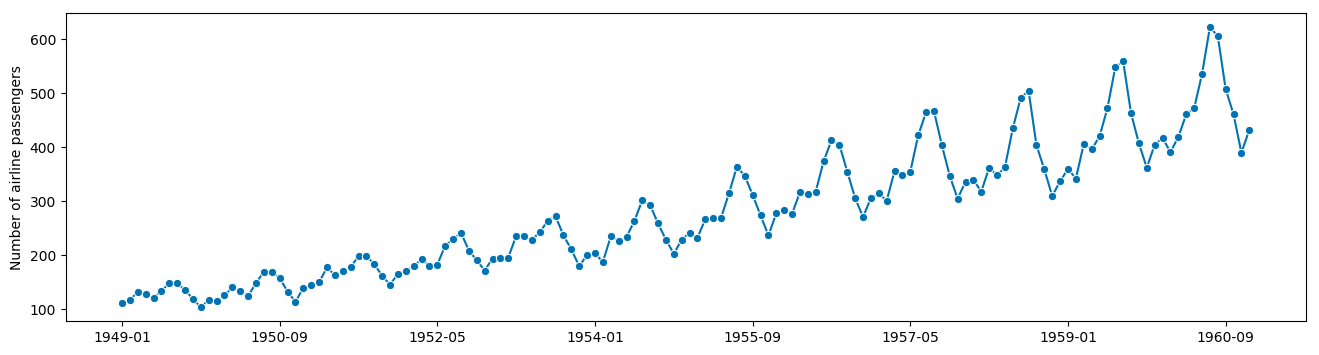

In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import numpy as np
y = load_airline() #we load an example dataset showing the monthly number of passengers on an airline

# plotting for visualization
plot_series(y)

/home/igor/anaconda3/lib/python3.7/site-packages/sktime/utils/seasonality.py:126: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  aix_int = aix.astype("int64")
/home/igor/anaconda3/lib/python3.7/site-packages/sktime/utils/seasonality.py:140: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  ix = ix.astype("int64")


(<Figure size 1600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec65016198>)

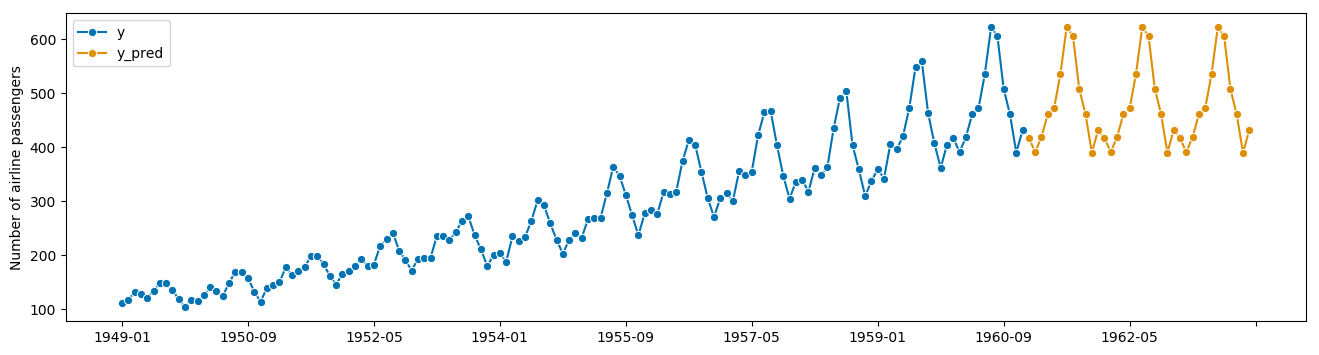

In [ ]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)



# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


22:31:15 - cmdstanpy - INFO - Chain [1] start processing
22:31:15 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec64fe0320>)

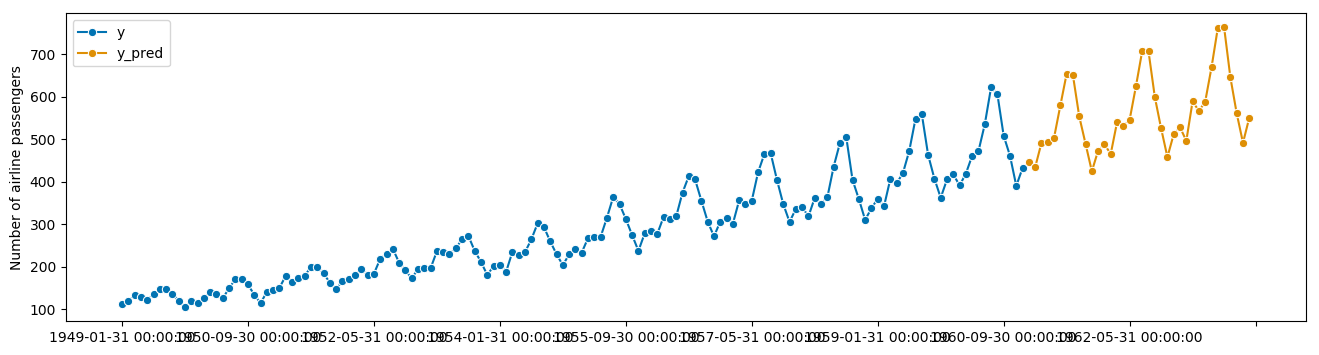

In [ ]:
!pip install prophet
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
ym = load_airline().to_timestamp(freq='M')
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(ym)
Prophet(...)
y_predm = forecaster.predict(fh)
plot_series(ym, y_predm, labels=["y", "y_pred"])

# Excercise:
 download the prices of : eggs, chicken, beef, milk from https://fred.stlouisfed.org/categories/32217, other if you want

estimate what is the best blend of products for the cat food problem for june of this year, is it the same for september?


Steps:
- load the data
- plot the data
- try to find a model that forecasts the data well
- make a prediction for june of this year
- make a prediction for september of this year
- use the predictions to put the price of the blend of products on the market
- use a typical linear programming model to find the best blend of products that minimizes the cost of the blend

# Regression models

Regression models are a type of supervised learning where we estimate a function that maps inputs to outputs.





In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_failures = pd.read_csv('data/sensor_readings_timeseries.csv')

# Display the first few rows to verify loading
print(df_failures.head())

# Display basic information about the DataFrame
print(df_failures.info())

# Display descriptive statistics
df_failures.describe()

   instance_id  machine_id department failure_type  time  sensor_temp  \
0            1           4    Welding   Electrical   0.0    67.130853   
1            1           4    Welding   Electrical  10.0    64.090451   
2            1           4    Welding   Electrical  20.0    64.679567   
3            1           4    Welding   Electrical  30.0    65.770517   
4            1           4    Welding   Electrical  40.0    64.381258   

   sensor_vib         rul  near_failure  
0    0.138695  346.347618             0  
1    0.134828  336.347618             0  
2    0.147687  326.347618             0  
3    0.176797  316.347618             0  
4    0.143335  306.347618             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816914 entries, 0 to 1816913
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   instance_id   int64  
 1   machine_id    int64  
 2   department    object 
 3   failure_type  object 
 4   time          float64
 5   sen

,instance_id,machine_id,time,sensor_temp,sensor_vib,rul,near_failure
count,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06
mean,3.965599e+03,2.049183e+00,5.515157e+03,6.096937e+01,1.166420e+00,5.510259e+03,2.627862e-02
std,2.329787e+03,1.222535e+00,8.289843e+03,1.054089e+01,2.092766e+00,8.289824e+03,1.599627e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,4.048126e+01,1.000000e-02,0.000000e+00,0.000000e+00
25%,1.901000e+03,1.000000e+00,6.900000e+02,5.268232e+01,1.147477e-01,6.863325e+02,0.000000e+00
50%,3.926000e+03,1.000000e+00,2.180000e+03,5.750420e+01,1.579365e-01,2.178096e+03,0.000000e+00
75%,6.052000e+03,3.000000e+00,6.560000e+03,6.787180e+01,1.047256e+00,6.550547e+03,0.000000e+00
max,8.000000e+03,4.000000e+00,6.698248e+04,1.014059e+02,9.804436e+00,6.698248e+04,1.000000e+00


In [ ]:
try:
    # Try running the generation scripts
    !python generate_four_machines.py
    !python generate_sensor_timeseries.py
except:
    # If generation fails, download the data file
    import os
    if not os.path.exists('data'):
        os.makedirs('data')

    !curl -L https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv -o data/sensor_readings_timeseries.csv


/home/igor/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
Generated 8000 failure records.
First 5 records:
   machine_id department failure_type           ttf
0           4    Welding   Mechanical  10308.096762
1           3  Packaging   Electrical    553.156241
2           1  Packaging   Electrical   6079.836050
3           1  Packaging   Mechanical    731.623543
4           4    Welding   Mechanical   1779.182145
Data saved to data/machine_failures.csv
/home/igor/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
Loading failure data from data/machine_failures.csv...
Loaded 8000 failure events.
Generating time series sensor data...
  Processed 500/8000 instances...
  

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_failures[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
y = df_failures['near_failure']
# Get unique instance IDs
unique_instances = df_failures['instance_id'].unique()

# Split the instance IDs into training and testing sets (70% train, 30% test)
train_instances, test_instances = train_test_split(
    unique_instances,
    test_size=0.3,
    random_state=42
)

# Create train and test sets based on instance IDs
X_train = X[df_failures['instance_id'].isin(train_instances)]
y_train = y[df_failures['instance_id'].isin(train_instances)]

X_test = X[df_failures['instance_id'].isin(test_instances)]
y_test = y[df_failures['instance_id'].isin(test_instances)]

print(f"Training set size: {len(X_train)} samples from {len(train_instances)} instances")
print(f"Testing set size: {len(X_test)} samples from {len(test_instances)} instances")


Training set size: 1255423 samples from 5600 instances
Testing set size: 561491 samples from 2400 instances


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Import additional classifiers for comparison
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:



# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42,  # For reproducibility
    class_weight='balanced',  # Address class imbalance
    max_depth=5
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=42)

In [ ]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)



/home/igor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/igor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/igor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behav

NameError: name 'X_train' is not defined

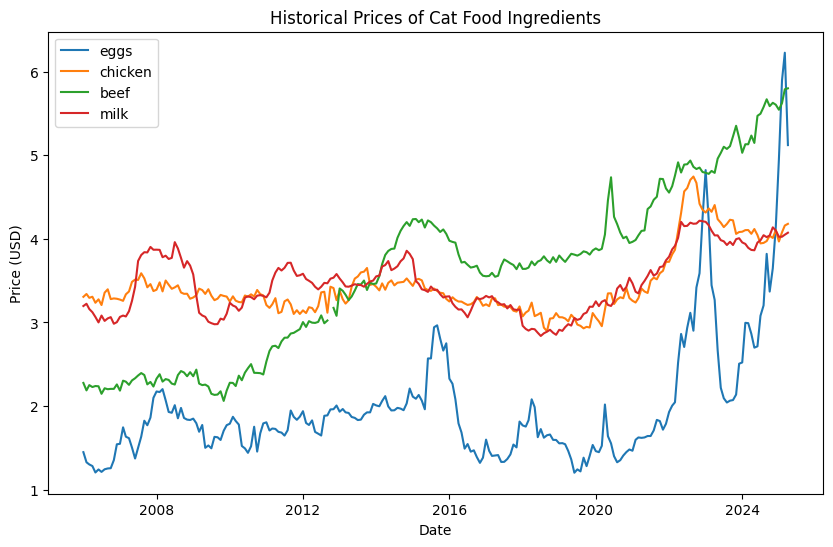

Predicted Prices for June and September 2025:
             eggs   chicken      beef      milk
2025-06  4.646319  4.202958  5.969753  4.102244
2025-09  4.795165  4.203769  5.967229  4.161085

Optimal Blend for 2025-06 (units):
  eggs: 0.00
  chicken: 0.00
  beef: 0.00
  milk: 0.23
Total cost: $0.96

Optimal Blend for 2025-09 (units):
  eggs: 0.00
  chicken: 0.00
  beef: 0.00
  milk: 0.23
Total cost: $0.98


In [ ]:



!pip install pulp pandas_datareader statsmodels matplotlib
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime
import pulp


series_ids = {
    'eggs': 'APU0000708111',       # Eggs, Grade A, Large (Cost per Dozen)
    'chicken': 'APU0000FF1101',    # Chicken Breast, Boneless (Cost per Pound)
    'beef': 'APU0000703112',       # Ground Beef, 100% Beef (Cost per Pound)
    'milk': 'APU0000709112'        # Milk, Fresh, Whole, Fortified (Cost per Gallon)
}
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2025, 4, 30)

prices = pd.DataFrame()
for name, sid in series_ids.items():
    prices[name] = DataReader(sid, 'fred', start, end)
prices.index = prices.index.to_period('M')

df = prices.copy()
plt.figure(figsize=(10,6))
for col in df.columns:
    plt.plot(df.index.to_timestamp(), df[col], label=col)
plt.legend()
plt.title('Historical Prices of Cat Food Ingredients')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

forecast_horizon = 12
predictions = {}
for col in df.columns:
    model = SARIMAX(df[col], order=(1,1,1), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=False)
    fc = res.get_forecast(steps=forecast_horizon)
    pred = fc.predicted_mean
    pred.index = pd.period_range(start=df.index[-1] + 1, periods=forecast_horizon, freq='M')
    predictions[col] = pred

pred_df = pd.DataFrame(predictions)
#Predicted prices
periods = ['2025-06', '2025-09']
period_idx = [pd.Period(p, 'M') for p in periods]
print("Predicted Prices for June and September 2025:")
print(pred_df.loc[period_idx])

# Requirements
requirements = {'protein': 30, 'fat': 20}
table = {
    'eggs':    {'protein': 72,  'fat': 48},
    'chicken': {'protein': 88,  'fat': 10},
    'beef':    {'protein': 80,  'fat': 64},
    'milk':    {'protein':128,  'fat':128}
}

for period in period_idx:
    costs = pred_df.loc[period]
    prob = pulp.LpProblem(f"CatFood_{period}", pulp.LpMinimize)
    # Variables
    x = {prod: pulp.LpVariable(f"x_{prod}", lowBound=0) for prod in series_ids}
    # Objective
    prob += pulp.lpSum([costs[prod] * x[prod] for prod in series_ids]), "TotalCost"
    # Constraints
    for nutrient, req in requirements.items():
        prob += pulp.lpSum([table[prod][nutrient] * x[prod] for prod in series_ids]) >= req, f"min_{nutrient}"
    # Solve
    prob.solve(pulp.PULP_CBC_CMD(msg=False))
    print(f"\nOptimal Blend for {period} (units):")
    for prod in series_ids:
        print(f"  {prod}: {x[prod].varValue:.2f}")
    print(f"Total cost: ${pulp.value(prob.objective):.2f}")

Our script forecasts cat food ingredient prices and optimizes their blend to meet nutritional needs. It retrieves historical price data for eggs, chicken, beef, and milk from the FRED database and visualizes trends.

Using a SARIMAX model, it predicts prices for June and September 2025. The script then sets up a linear optimization problem to minimize costs while ensuring at least 30 grams of protein and 20 grams of fat per serving.

With the PuLP library, it calculates the optimal ingredient amounts and total costs for those months, providing a cost-effective approach to cat food formulation.

# Excercise:  Try to get the accuracy to over 98% by changing the model or the parameters

In [ ]:

!pip install scikit-learn pandas numpy joblib

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

data_path = 'data/sensor_readings_timeseries.csv'
if not os.path.isfile(data_path):
    os.makedirs('data', exist_ok=True)
    print(f'Downloading sensor data to {data_path}...')
    import urllib.request
    url = 'https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv'
    urllib.request.urlretrieve(url, data_path)
    print('Download complete.')

#Load
df = pd.read_csv(data_path)

#Split by instance_id
instances = df['instance_id'].unique()
train_ids, test_ids = train_test_split(instances, test_size=0.3, random_state=42)
train_df = df[df['instance_id'].isin(train_ids)]
test_df = df[df['instance_id'].isin(test_ids)]

#Features/target
features = ['machine_id', 'time', 'sensor_temp', 'sensor_vib']
X_train = train_df[features]
X_test = test_df[features]
y_train = train_df['near_failure']
y_test = test_df['near_failure']

#Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define models
models = {
    'rf': RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        max_features='sqrt',
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ),
    'gb': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=7,
        random_state=42
    ),
    'svc': SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        random_state=42
    ),
    'lr': LogisticRegression(
        C=1,
        penalty='l2',
        solver='liblinear',
        max_iter=5000,
        random_state=42
    ),
    'knn': KNeighborsClassifier(
        n_neighbors=7,
        weights='distance'
    )
}

best_models = {}
results = {}

#Train/evaluate
def train_and_evaluate(name, model, need_scaling=True):
    print(f"Training {name}...")
    if need_scaling:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        pipe = Pipeline([('scaler', scaler), ('clf', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        model = pipe
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    best_models[name] = model
    results[name] = acc

for name, model in models.items():
    #RF and GB
    if name in ['rf', 'gb']:
        train_and_evaluate(name, model, need_scaling=True)
    else:
        train_and_evaluate(name, model, need_scaling=False)

#Save
top_model_name = max(results, key=results.get)
print(f"\nBest Model: {top_model_name} with accuracy {results[top_model_name]:.4f}")
joblib.dump(best_models[top_model_name], 'best_sensor_failure_model.pkl')


Training rf...
rf Test accuracy: 0.9135
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     52898
           1       0.49      0.89      0.63      4800

    accuracy                           0.91     57698
   macro avg       0.74      0.90      0.79     57698
weighted avg       0.95      0.91      0.92     57698

Training gb...


KeyboardInterrupt: 

# Excercise:

- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 87.18 degrees Celsius and a vibration level of 5.96.
- A reading for a machine of type 1 was recorded when machine had 250.0 workhours. Its sensor showed a temperature of 76.05 degrees Celsius and a vibration level of 8.43.
- A reading for a machine of type 3 was recorded when machine had 690.0 workhours. Its sensor showed a temperature of 57.36 degrees Celsius and a vibration level of 0.07.
- A reading for a machine of type 1 was recorded when machine had 20510.0 workhours. Its sensor showed a temperature of 53.30 degrees Celsius and a vibration level of 0.08.
- A reading for a machine of type 2 was recorded when machine had 270.0 workhours. Its sensor showed a temperature of 71.13 degrees Celsius and a vibration level of 0.22.
- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 67.56 degrees Celsius and a vibration level of 0.13.

You have two technicians available, that cost 600 PLN/hour. You have a budget of 1800 PLN. Each machine requires an hour to service. Which machine to service if machine of the type 1,2 failure cost you 3000 PLN, machine of the 3, 4 failure costs you 2500 PLN?

In [ ]:
import pandas as pd
data = [
    {"id": "A", "type": 4, "workhours": 110.0,   "temp": 87.18, "vibration": 5.96},
    {"id": "B", "type": 1, "workhours": 250.0,   "temp": 76.05, "vibration": 8.43},
    {"id": "C", "type": 3, "workhours": 690.0,   "temp": 57.36, "vibration": 0.07},
    {"id": "D", "type": 1, "workhours": 20510.0, "temp": 53.30, "vibration": 0.08},
    {"id": "E", "type": 2, "workhours": 270.0,   "temp": 71.13, "vibration": 0.22},
    {"id": "F", "type": 4, "workhours": 110.0,   "temp": 67.56, "vibration": 0.13},
]

df = pd.DataFrame(data)
failure_cost_map = {1: 3000, 2: 3000, 3: 2500, 4: 2500}
df["failure_cost"] = df["type"].map(failure_cost_map)
df["workhours_norm"] = (df["workhours"] - df["workhours"].min()) / (df["workhours"].max() - df["workhours"].min())
df["risk_score"] = (
    df["temp"] * 0.4 +
    df["vibration"] * 0.3 +
    df["workhours_norm"] * 0.3
)


df_sorted = df.sort_values(by="risk_score", ascending=False)
technician_cost_per_hour = 600
budget = 1800
hours_available = budget // technician_cost_per_hour
machines_to_service = df_sorted.head(hours_available)

print("Machines to service based on risk score and budget:")
print(machines_to_service[["id", "type", "workhours", "temp", "vibration", "failure_cost", "risk_score"]])


Machines to service based on risk score and budget:
  id  type  workhours   temp  vibration  failure_cost  risk_score
0  A     4      110.0  87.18       5.96          2500   36.660000
1  B     1      250.0  76.05       8.43          3000   32.951059
4  E     2      270.0  71.13       0.22          3000   28.520353


The code creates a table of machines, each with information such as type, work hours, temperature, and vibration. It assigns a failure cost to each machine based on its type and normalizes the work hours to allow fair comparison. A risk score is then calculated for each machine using a weighted formula that includes temperature (40%), vibration (30%), and normalized work hours (30%). The machines are sorted in descending order by their risk score to identify those most at risk. Based on a technician's hourly rate and a fixed budget, the code determines how many machines can be serviced. Finally, it selects the top machines within budget and prints their details along with the calculated risk scores.
